In [ ]:
import pandas as pd

# Läser in fliken "Veckodata Riket" från datafilen "fhm_covid19" .
df_covid19 = pd.read_excel('Data/fhm_covid19.xlsx', sheet_name='Veckodata Riket')

# En initial dataanalys av "Veckodata Riket"
print(df_covid19.info())
print(df_covid19.describe())
print(df_covid19['Antal_fall_vecka'].value_counts())
print(df_covid19.head())
print(df_covid19.columns)
print(df_covid19.index)

In [ ]:
# Slår ihop kolumnerna "år" och "veckonummer" till en "Vecka"-kolumn.
df_covid19['Vecka'] = df_covid19['år'].astype(str) + "v" + df_covid19['veckonummer'].astype(str)

print(df_covid19.head())

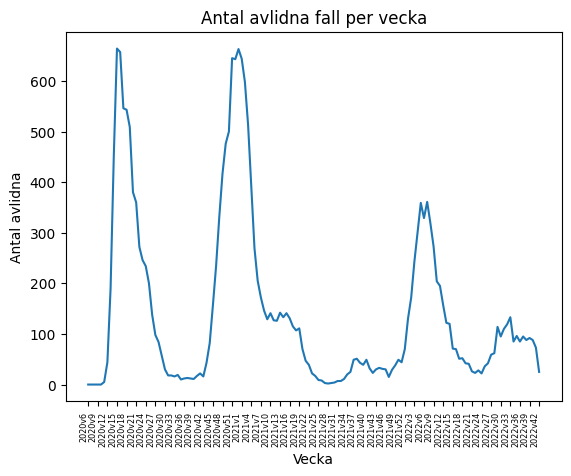

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Väljer var tredje vecka att visa
tick_spacing = 3
ticks_to_show = df_covid19['Vecka'].iloc[::tick_spacing]

# Skapar ett linjediagram över antalet avlidna fall per vecka
sns.lineplot(data=df_covid19, x='Vecka', y='Antal_avlidna_vecka')
plt.xticks(ticks=ticks_to_show.index, labels=ticks_to_show.values, fontsize='xx-small', rotation=90, ha='right') # Justera x-axel etiketter för läsbarhet
plt.title("Antal avlidna fall per vecka")
plt.xlabel('Vecka')
plt.ylabel('Antal avlidna')
plt.savefig('Visualisering/avlidna_per_vecka.png', facecolor='w') # Sparar diagrammet & sätter bakgrundsfärgen till vit 
plt.show()